# Algoritmos de clasificación

En canvas podrás encontrar la base de datos "iris-data". Borra la variable "Id" de la base de datos, ya que esta no contiene información relevante. Explica los algoritmos que utilizan los métodos de clasificación: regresión logística, Bayes y análisis de discriminate. De ser el caso muestra las ecuaciones correspondientes.

Utiliza los algoritmos de clasificación antes mencionados para predecir el tipo de planta.  Utiliza todas las variables de la base de datos como variables regresoras. Muestra la exactitud de cada modelo y su correspondiente matriz de confusión. ¿Qué modelo fue el méjor? ¿Por qué crees que se suceda esto?

In [55]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/7mo Semestre/Colab Notebooks/DataSources/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
df = df.drop('Id', axis = 1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [57]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Seleccionamos nuestras variables regresoras $x$ y la variable a predecir $y$

In [58]:
x = df.iloc[:len(df), [0,1,2,3]].values
y = df.iloc[:len(df), -1]
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [59]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2

In [61]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

## Regresión Logística

### Procedimiento

In [62]:
from numpy.random.mtrand import logistic
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train,y_train)
log_y_predict = logistic.predict(x_test)
x_test

array([[ 0.14443512, -0.63451517,  0.45110832, -0.07943674],
       [-0.33701527,  2.00929805, -1.2060243 , -1.20827465],
       [ 2.07023667, -1.16327782,  1.66633891,  1.30025404],
       [ 0.02407252, -0.37013385,  0.34063282,  0.29684256],
       [ 0.98697329, -0.63451517,  0.50634608,  0.17141613],
       [-0.69810306,  0.95177276, -1.3164998 , -1.08284822],
       [-0.45737787, -0.37013385, -0.15650697,  0.04598969],
       [ 1.10733589,  0.15862879,  0.67205934,  1.30025404],
       [ 0.26479771, -2.22080311,  0.34063282,  0.29684256],
       [-0.21665267, -0.8988965 ,  0.00920629, -0.07943674],
       [ 0.6258855 ,  0.42301012,  0.67205934,  0.92397473],
       [-1.42027864, -0.10575253, -1.37173756, -1.45912752],
       [-0.57774046,  1.21615408, -1.42697531, -1.33370109],
       [-1.29991605,  0.15862879, -1.3164998 , -1.45912752],
       [-1.05919085,  2.00929805, -1.3164998 , -1.20827465],
       [ 0.38516031,  0.68739144,  0.45110832,  0.422269  ],
       [ 0.6258855 , -0.

In [63]:
log_y_predict

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [64]:
y_train

22         Iris-setosa
15         Iris-setosa
65     Iris-versicolor
11         Iris-setosa
42         Iris-setosa
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: Species, Length: 120, dtype: object

In [65]:
x_train

array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358],
       [ 0.59831066, -1.25412249,  0.72966956,  0.95628954],
       [ 0.72020757,  0.32056046,  0.44296246,  0.42316645],
       [-0.74255534,  0.99542457, -1.27728011, -1.30948358],
       [-0.98634915,  1.22037928, -1.33462153, -1.30948358],
       [-0.74255534,  2.34515281, -1.27728011, -1.44276436],
       [-0.01117388, -0.80421307,  0.78701097,  0.95628954],
       [ 0.23261993,  0.77046987,  0.44296246,  0.55644722],
       [ 1.08589829,  0.09560575,  0.5576453 ,  0.42316645],
       [-0.49876152,  1.8952434 , -1.39196294, -1.04292204],
       [-0.49876152,  1.44533399, -1.27728011, -1.30948358],
       [-0.37686461, -1.47907719, -0.01576889, -0.24323741],
       [ 0.59831066, -0.

### Exactitud

In [66]:
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, log_y_predict)
print(exactitud)

0.9666666666666667


In [67]:
print("Exactitud del modelo", logistic.score(x_test, y_test))

Exactitud del modelo 0.9666666666666667


### Matríz de Confusión

In [68]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, log_y_predict)
print(confusion)

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


Text(0.5, 23.52222222222222, 'Prediccion')

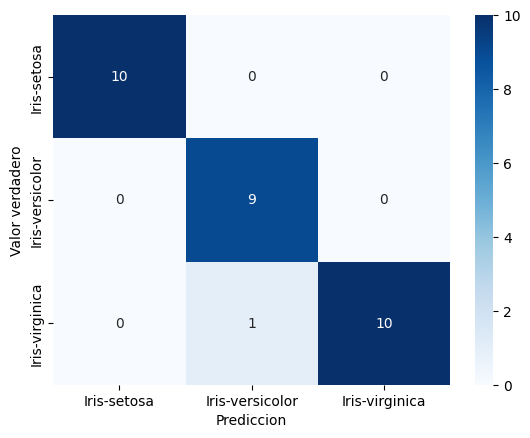

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion, annot = True, cmap = 'Blues')
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
tick_marks = [0.5, 1.5, 2.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Valor verdadero')
plt.xlabel('Prediccion')

## Teorema de Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [71]:
nb_y_predict = nb.predict(x_test)
print(nb_y_predict)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [72]:
exactitud = accuracy_score(y_test, nb_y_predict)
print(exactitud)

0.9666666666666667


In [73]:
print("Exactitud del modelo", nb.score(x_test, y_test))

Exactitud del modelo 0.9666666666666667


In [74]:
confusion = confusion_matrix(y_test, nb_y_predict)
print(confusion)

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


Text(0.5, 23.52222222222222, 'Prediccion')

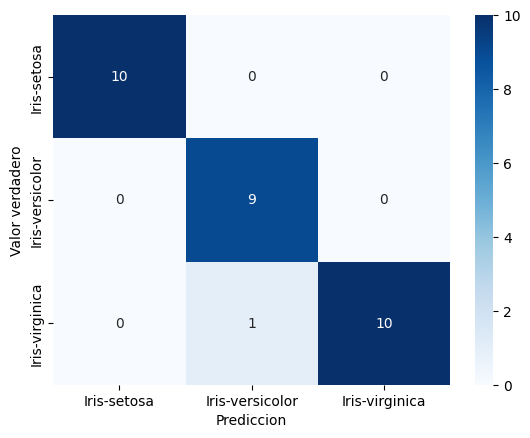

In [75]:
sns.heatmap(confusion, annot = True, cmap = 'Blues')
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
tick_marks = [0.5, 1.5, 2.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Valor verdadero')
plt.xlabel('Prediccion')

## Análisis del Discriminante

In [76]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
adl_model = LinearDiscriminantAnalysis()
adl_model.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [77]:
adl_y_pred =adl_model.predict(x_test)
adl_y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype='<U15')

In [78]:
exactitud = accuracy_score(y_test, adl_y_pred)
print(exactitud)

0.9666666666666667


In [79]:
print("Exactitud del modelo", adl_model.score(x_test, y_test))

Exactitud del modelo 0.9666666666666667


In [80]:
confusion = confusion_matrix(y_test, adl_y_pred)
print(confusion)

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


Text(0.5, 23.52222222222222, 'Prediccion')

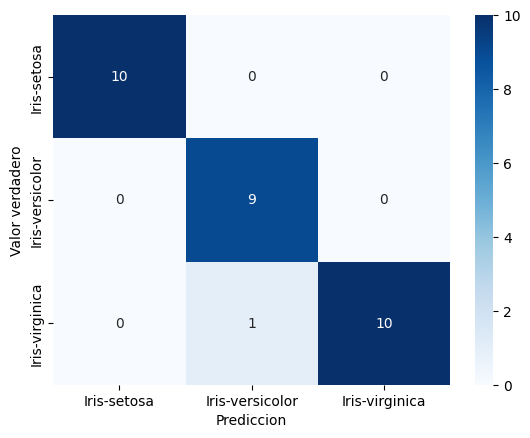

In [81]:
sns.heatmap(confusion, annot = True, cmap = 'Blues')
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
tick_marks = [0.5, 1.5, 2.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Valor verdadero')
plt.xlabel('Prediccion')

# Conclusiones

Como podemos observar tenemos varios modelos, que practicamente nos dan la misma exactitud y la misma matriz de confusión. Por lo que podemos intuir que para este caso en especial, con estos datos, practicamente cualquiera de los 3 modelos, ya sea la Regresión Logística, con el Teorema de Bayes, o con el Analisis del discriminante, es un buen modelo y es confiable para hacer predicciones para nuestra variable categorica.